# SIT742: Modern Data Science 
**(2021 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your group information in the following cell.   
</div>

**Student Information:** Please fill your group information below

- Group ID:**Task2G3M 69**
- Names: **Yash Ahuja, Somya Kapoor, Priya Singh** 
- Student IDs: **219608443, 219339951, 219592426**
- Emails: **ahujaya@deakin.edu.au, skapoor@deakin.edu.au, pri@deakin.edu.au** 
- Lab Session and Tutor (for on campus students): 

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages. 

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ipywidgets import IntProgress
import pandas as pd
import numpy as np
from IPython.display import display
from zipfile import ZipFile


# Your file might be in a different location, so you need to customize the path
all_files = ZipFile('/content/drive/My Drive/Colab Notebooks/HTWebLog_p1.zip', 'r')
files = all_files.namelist()


data = []
# Define the column names
ColumnNames=['date','time','s_sitename','s_ip','cs_method','cs_uri_stem','cs_uri_query','s_port','cs_username',
             'c_ip','cs(User_Agent)','cs(Referer)','sc_status','sc_substatus','sc_win32_status']

#Tracking the loading progress of log files
LoadingWidget = IntProgress(description ='Progress:', bar_style ='success', style={'bar_color':'green'}, orientation='horizontal', value=0, min=0, max=len(files), step=1) 
display(LoadingWidget)

# Loading each file into a dataframe
for file in files:
  LoadingWidget.value += 1
  df_file = pd.read_csv(all_files.open(file), skiprows=4, header=None, delim_whitespace=True, error_bad_lines=False, warn_bad_lines=False, na_values='-', encoding='iso-8859-1',\
                            usecols=np.arange(15), names=ColumnNames, \
                            dtype={'date':str,'time':str,'s_sitename':str,'s_ip':str,'cs_method':str,'cs_uri_stem':str,'cs_uri_query':str,'s_port':str,'cs_username':str, \
                                   'c_ip':str,'cs(User_Agent)':str,'cs(Referer)':str,'sc_status':str,'sc_substatus':str,'sc_win32_status':str})
  
  # removing comment rows in the middle of log files starting with '#' in date column
  df_file = df_file[~df_file['date'].str.contains('#')]
  # appending files to data list
  data.append(df_file)

# joining the list of all dataframes into a single dataframe
df_ht = pd.concat(data, ignore_index=True)

print("Number of log files loaded: "+str(LoadingWidget.value))

IntProgress(value=0, bar_style='success', description='Progress:', max=120, style=ProgressStyle(bar_color='gre…

Number of log files loaded: 120


In [ ]:
# printing top 5 rows
df_ht.head()

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,cs_uri_query,s_port,cs_username,c_ip,cs(User_Agent),cs(Referer),sc_status,sc_substatus,sc_win32_status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200,0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,NaN,200,0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,NaN,80,NaN,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200,0,0


In [ ]:
# Dimensions (Rows, Columns of the dataframe prior to cleaning)
df_ht.shape

(8438928, 15)

In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification. 

**Code**: 
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
# Number of null values (NA) in each column
df_ht.isna().sum()

date                     0
time                     0
s_sitename               0
s_ip                     0
cs_method                0
cs_uri_stem              0
cs_uri_query       7886532
s_port                   0
cs_username        8438928
c_ip                     0
cs(User_Agent)        3527
cs(Referer)        1308994
sc_status                0
sc_substatus             0
sc_win32_status          0
dtype: int64

In [ ]:
# Calculating NA percentage of each column
NA_percent = (df_ht.isna().sum()) / (df_ht.shape[0]) * 100 
NA_percent

date                 0.000000
time                 0.000000
s_sitename           0.000000
s_ip                 0.000000
cs_method            0.000000
cs_uri_stem          0.000000
cs_uri_query        93.454192
s_port               0.000000
cs_username        100.000000
c_ip                 0.000000
cs(User_Agent)       0.041794
cs(Referer)         15.511378
sc_status            0.000000
sc_substatus         0.000000
sc_win32_status      0.000000
dtype: float64

In [ ]:
# Removing columns with atleast 15% NAs i.e. cs_uri_query, cs_username, cs(Referer)
df_ht.drop(labels=['cs_uri_query', 'cs_username', 'cs(Referer)'], axis=1, inplace=True)

# Removing rows (requests) containing any NAs
df_ht.dropna(axis=0, how='any', inplace=True)

In [ ]:
# Dimensions (Rows (requests), Columns of the final cleaned dataframe)
df_ht.shape

(8435401, 12)

In [ ]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

# Number of requests (rows) in weblog_df
print('The number of requests in weblog_df is: '+str(weblog_df.shape[0]))

The number of requests in weblog_df is: 2530620


### 1.2 Feature Selection

**Code**: 
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks. 

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
# Resetting the index of weblog_df
weblog_df = weblog_df.reset_index(drop=True)
weblog_df.head()

,date,time,s_sitename,s_ip,cs_method,cs_uri_stem,s_port,c_ip,cs(User_Agent),sc_status,sc_substatus,sc_win32_status
0,2006-12-03,09:39:19,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_zh-hk.gif,80,218.102.231.100,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
1,2006-12-04,15:30:01,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_logo.gif,80,218.190.226.30,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
2,2007-02-23,06:50:42,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_about...,80,203.241.147.26,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304,0,64
3,2006-11-17,06:35:25,W3SVC1,127.0.0.1,GET,/Tulip/public/2899_2.jpg,80,203.85.132.97,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0
4,2007-02-23,16:56:08,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/topmenu_zh-hk.gif,80,218.186.9.5,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200,0,0


In [ ]:
# Creating the new dataframe ml_df comprising features i.e. cs_method,c_ip,cs_uri_stem,cs(User_Agent) and class labels i.e. sc_status for Machine Learning Tasks
ml_df = weblog_df.loc[:,['cs_method','c_ip','cs_uri_stem','cs(User_Agent)','sc_status']]
# Printing top five rows of ml_df
ml_df.head()

,cs_method,c_ip,cs_uri_stem,cs(User_Agent),sc_status
0,GET,218.102.231.100,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
1,GET,218.190.226.30,/Tulip/common/en-us/images/top_logo.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2,GET,203.241.147.26,/Tulip/common/en-us/images/sectionbanner_about...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
3,GET,203.85.132.97,/Tulip/public/2899_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
4,GET,218.186.9.5,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


In [ ]:
# Data description of ml_df
ml_df.describe().transpose()

,count,unique,top,freq
cs_method,2530620,6,GET,2525568
c_ip,2530620,69837,59.188.33.66,27935
cs_uri_stem,2530620,3616,/Tulip/common/common_style.aspx,121304
cs(User_Agent),2530620,4653,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,594218
sc_status,2530620,12,200,1821993


## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**: 
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot. 
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [ ]:
# Importing Data Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt 

**1. Performing unsupervised learning on ml_df with K Means, with a varying K from 2 to 10; plotting the elbow plot.**

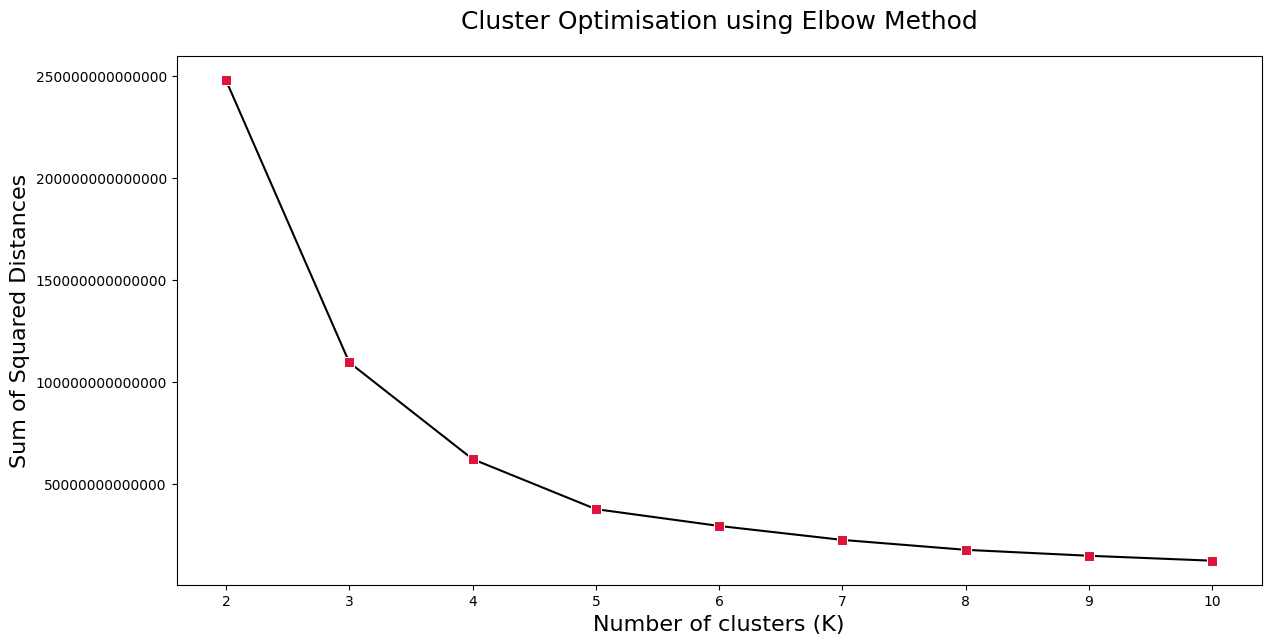

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans 

# Label Encoding (Converting categorical data into numerical format which is a prerequisite for KMeans)

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

# Perfroming KMeans with k varying from 2 to 10

# Selecting the features from le_df dataframe
X = le_df.loc[:,['cs_method','c_ip','cs_uri_stem','cs(User_Agent)']].values
# Creating a list of Within Cluster Sum of Squared Distances (WCSSD) metric for elbow plot
wcssd = []
for k in range(2, 11):
  k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=13)
  k_means.fit(X)
  wcssd.append(k_means.inertia_)

# Visualizing K means result as elbow plot
plt.figure(figsize=[14,7], dpi=100)
sns.lineplot(x=range(2,11), y=wcssd, c='black', marker='s', markersize=7, markerfacecolor='crimson')
plt.title('Cluster Optimisation using Elbow Method', pad=20, fontsize=18)
plt.xlabel('Number of clusters (K)', fontsize=16)
plt.ylabel('Sum of Squared Distances', fontsize=16)
# Removing the scientific notation as multiplier on y-axis
plt.ticklabel_format(style='plain')
plt.show()

**From the above figure, it is evident that Optimal value of K for this dataset is 5 as it is the smallest value of K where WCSSD is low and increasing the number of clusters will not significantly reduce the WCSSD. A sharp line angle or an 'elbow' on the arm is identified at this point K=5 implying the best value of K. Hence, the name of the method is elbow method.**

*WCSSD is Within Cluster Sum of Squared Distances, a key metric for cluster evaluation. A low WCSSD value indicates high similarity within clusters and therefore implying good clustering.*

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark 
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark 
findspark.init() 

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://developer.

In [ ]:
from pyspark.sql import SparkSession 
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation 

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

In [ ]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)
print('Total Dataset Count: '+str(sl_df.count()))

Total Dataset Count: 253029


In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
df_temp.show(3)

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    18825|2741|       1385|             0|[18825.0,2741.0,1...|
|        0|    68103|2425|       1459|             0|[68103.0,2425.0,1...|
|        0|    41459|2087|       4238|             0|[41459.0,2087.0,4...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [ ]:
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')
df_sl.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[18825.0,2741.0,1...|
|        0|[68103.0,2425.0,1...|
|        0|[41459.0,2087.0,4...|
+---------+--------------------+
only showing top 3 rows



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**: 
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3], seed=1)
print('Training Dataset Count: '+str(trainingData.count()))
print('Testing Dataset Count: '+str(testData.count()))

Training Dataset Count: 177122
Testing Dataset Count: 75907


In [ ]:
# Number of sc-status class labels in training dataset 
sc_labels = trainingData.select('sc_status').collect()
sc_labels = [label[0] for label in sc_labels]
# Converting list to pandas series
sc_labels = pd.Series(sc_labels)
sc_labels.value_counts()


0    176751
3       207
1       151
2        11
5         1
4         1
dtype: int64

In [ ]:
# Number of sc-status class labels in test dataset 
sc_labels = testData.select('sc_status').collect()
sc_labels = [label[0] for label in sc_labels]
# Converting list to pandas series
sc_labels = pd.Series(sc_labels)
sc_labels.value_counts()

0    75765
3       79
1       57
2        4
5        1
4        1
dtype: int64

**1.Performing Supervised Learning based Mutlinomial Classification on ml_df using Logistic Regression Model** 

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Trainning from train data and predicting based on the test data
logr = LogisticRegression(featuresCol='features', labelCol='sc_status', maxIter=5, regParam=0.2, elasticNetParam=0)
logr_model = logr.fit(trainingData)
predictions_test = logr_model.transform(testData)
# Printing top 10 rows containing observations and predictions of sc-status
predictions_test.select('sc_status', 'prediction').show(10)

+---------+----------+
|sc_status|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 10 rows



**2.Evaluating the classification result using confusion matrix including TP, TN, FP, FN and classification report**

In [ ]:
!pip install scikit-plot

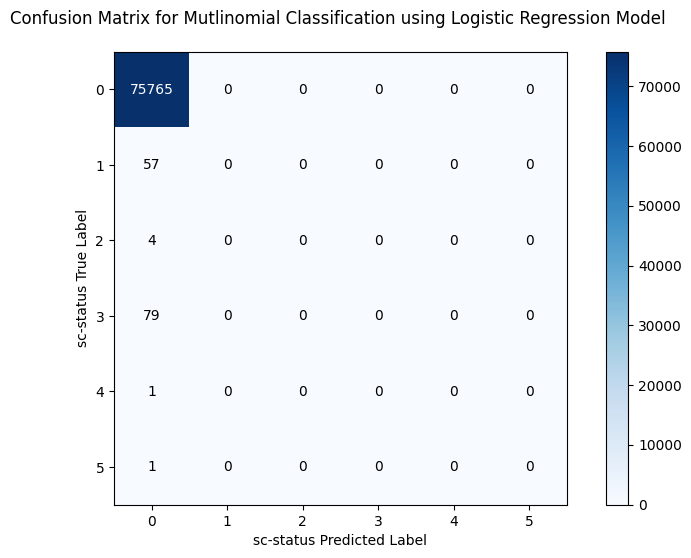

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt
# Converting spark dataframe to pandas dataframe
preds_df = predictions_test.toPandas()
# Plotting confusion matrix including TP, TN, FP, FN
fig, ax = plt.subplots(figsize=[10,6], dpi=100)
skplt.metrics.plot_confusion_matrix(y_true = preds_df['sc_status'], y_pred = preds_df['prediction'], ax=ax)
plt.title('Confusion Matrix for Mutlinomial Classification using Logistic Regression Model ', fontsize=12, pad=20)
plt.xlabel('sc-status Predicted Label', fontsize=10)
plt.ylabel('sc-status True Label', fontsize=10)
plt.show()

- **Training and Test Data only had 6 class labels of sc-status out of total 12 class labels of sc-status.**
- **Hence, the confusion matrix above is ($6\times 6$) as opposed to expected ($12\times 12$).**

In [ ]:
# Printing the classification report
print(classification_report(y_true = preds_df['sc_status'], y_pred = preds_df['prediction']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75765
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           1.00     75907
   macro avg       0.17      0.17      0.17     75907
weighted avg       1.00      1.00      1.00     75907



**3.Evaluating the classification result using Area Under the Curve, Precision, Recall and F1 score**


In [ ]:
# Evaluating Logistic Regression based MultiClassifier's performance
evaluator = MulticlassClassificationEvaluator(labelCol='sc_status', predictionCol='prediction')
print('Area Under the Curve: '+str(evaluator.evaluate(predictions_test)))
print('Precision: '+str(evaluator.evaluate(predictions_test, {evaluator.metricName:'weightedPrecision'})))
print('Recall: '+str(evaluator.evaluate(predictions_test, {evaluator.metricName:'weightedRecall'})))
print('F1 score: '+str(evaluator.evaluate(predictions_test, {evaluator.metricName:'f1'})))

Area Under the Curve: 0.9971948103915026
Precision: 0.9962620791343353
Recall: 0.9981292897888205
F1 score: 0.9971948103915026


### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**: 
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# K = 2
# Parameters
# maxIter --> the number of iterations taken for the solvers to converge
maxIter_plist = [5, 10, 15] 
# regParam --> regularization parameter
regParam_plist = [0.2, 0.4, 0.6] 
# elasticNetParam --> elastic net regularization parameter
elasticNetParam_plist = [0, 0.1, 0.2] 

# Developing parameter grid for k=2 fold cross validation by hyper tuning above parameters
parameter_grid = (ParamGridBuilder().addGrid(logr.maxIter, maxIter_plist)\
                  .addGrid(logr.regParam, regParam_plist)\
                  .addGrid(logr.elasticNetParam, elasticNetParam_plist).build())

# Creating K=2 fold cross validator
cross_valid = CrossValidator(estimator=logr, estimatorParamMaps=parameter_grid, evaluator=evaluator, numFolds=2)
# Cross validation model
cross_valid_model = cross_valid.fit(trainingData)
predictions = cross_valid_model.transform(testData)

# Best model Parameters
best_model = cross_valid_model.bestModel
best_maxIter = best_model._java_obj.getMaxIter()
best_regParam = best_model._java_obj.getRegParam()
best_elasticNetParam = best_model._java_obj.getElasticNetParam()

print('Best Model: "Maximum Iteration" parameter is= '+str(best_maxIter))
print('Best Model: "Regularization" parameter is= '+str(best_regParam))
print('Best Model: "Elastic Regularization" parameter is= '+str(best_elasticNetParam))

# Evaluating the best model
evaluator = MulticlassClassificationEvaluator(labelCol='sc_status', predictionCol='prediction')
print('Area Under the Curve for the best model is: '+str(evaluator.evaluate(predictions)))
print('Precision for the best model is: '+str(evaluator.evaluate(predictions, {evaluator.metricName:'weightedPrecision'})))
print('Recall for the best model is: '+str(evaluator.evaluate(predictions, {evaluator.metricName:'weightedRecall'})))
print('F1 score for the best model is: '+str(evaluator.evaluate(predictions, {evaluator.metricName:'f1'})))


# Printing results of the Best Model (top 10 rows containing observations and predictions of sc-status)
print('############################################################################################')
print('Predictions of the Best Model i.e. Top 10 rows containing observations and predictions of sc-status:')
predictions.select('sc_status', 'prediction').show(10)

Best Model: "Maximum Iteration" parameter is= 5
Best Model: "Regularization" parameter is= 0.2
Best Model: "Elastic Regularization" parameter is= 0.0
Area Under the Curve for the best model is: 0.9971948103915026
Precision for the best model is: 0.9962620791343353
Recall for the best model is: 0.9981292897888205
F1 score for the best model is: 0.9971948103915026
############################################################################################
Predictions of the Best Model i.e. Top 10 rows containing observations and predictions of sc-status:
+---------+----------+
|sc_status|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 10 rows



**It is evident that the parameters used for training i.e. maxIter = 5, regParam= 0.2, elasticNetParam=0 are found to be the ones which have the best model performance after performing K=2 fold Cross Validation and that is why Area Under the Curve, Precision, Recall and F1 score metrics are same for training model and cross validation model.**

## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**: 
Implement association rule mining with a suitable threshold for support, and confidence 
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=212aa524bcd3c0e2872be6de63e326ef638bb47c78f6159a591f43060cc45d4e
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
# Taking sample (19,000 requests) from whole dataframe (df_ht) for association rule mining due to computational limitations
arm_df = df_ht.sample(n=19000, random_state=1)
# Total Attributes in dataframe
attributes = arm_df.columns
for col in attributes:
  print(col)

date
time
s_sitename
s_ip
cs_method
cs_uri_stem
s_port
c_ip
cs(User_Agent)
sc_status
sc_substatus
sc_win32_status


In [ ]:
# Choosing appropriate attributes in order to make sense of the rules 
arm_df = arm_df.loc[:,['cs_method','c_ip','cs_uri_stem','cs(User_Agent)','sc_status']]
chosen_attr = arm_df.columns
for col in chosen_attr:
  print(col)

cs_method
c_ip
cs_uri_stem
cs(User_Agent)
sc_status


**Description of the above attributes:**
- `cs_method:` The type of action which client tried to perform.
- `cd_uri_stem:` The resource accessed by the client.
- `c_ip:` Client IP address i.e. the IP address of the client who accessed the server.
- `cs(User-Agent):` The browser used by the client to access the web server.
- `sc_status:` Protocol Status i.e. the status of the server to client (sc) action (represented by a success or error code).

The above attributes are chosen based on their context as they may or may not have significant association in real-world. 

In [ ]:
# you can also use PySpark package, if preferred
from apyori import apriori

# Resetting the index of arm_df
# arm_df = arm_df.reset_index(drop=True)

# Generating requests list
requests = []
for i in range(0, 19000):
  requests.append([str(arm_df.values[i,j]) for j in range(0, 5)])

print(requests)

[['GET', '218.102.231.100', '/Tulip/common/en-us/images/topmenu_zh-hk.gif', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)', '200'], ['GET', '218.190.226.30', '/Tulip/common/en-us/images/top_logo.gif', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)', '200'], ['GET', '203.241.147.26', '/Tulip/common/en-us/images/sectionbanner_aboutus_on.gif', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.0;+.NET+CLR+1.0.3705)', '304'], ['GET', '203.85.132.97', '/Tulip/public/2899_2.jpg', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)', '200'], ['GET', '218.186.9.5', '/Tulip/common/en-us/images/topmenu_zh-hk.gif', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+2.0.50727)', '200'], ['GET', '219.78.3.190', '/Tulip/common/images/bar_2.jpg', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322;+.NET+CLR+2.0.50727;+InfoPath.1)', '304'], ['GET', '70.237.49.12', '/Tulip/accommodation/en-us/images/sectionbanner.swf', 'Mozilla/5.0+(Windows;+U;+W

In [ ]:
# Applying the apriori algorithm
rules = apriori(requests, min_support=0.001, min_confidence=0.2, min_lift=3, max_length=2)

# Printing out the rules
output = list(rules)
#print(output)
for i in range(len(output)):
  print('#################################################################################')
  print(i)
  print(output[i])

#################################################################################
0
RelationRecord(items=frozenset({'206', '/Tulip/dining/images/tohLee.pdf'}), support=0.0011052631578947368, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/Tulip/dining/images/tohLee.pdf'}), items_add=frozenset({'206'}), confidence=1.0, lift=115.15151515151516)])
#################################################################################
1
RelationRecord(items=frozenset({'206', '/Tulip/public/7036_4.pdf'}), support=0.0012105263157894737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/Tulip/public/7036_4.pdf'}), items_add=frozenset({'206'}), confidence=0.7666666666666667, lift=88.28282828282829)])
#################################################################################
2
RelationRecord(items=frozenset({'/aspnet_client/system_web/1_1_4322/WebUIValidation.js', '404'}), support=0.0020526315789473684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'/aspnet

In [ ]:
# Printing out the rules in another way to make it easily interpretable
for rule in output:
  frozen_set = rule[0]
  elements = [x for x in frozen_set]
  print('#################################################################################')
  print('Rule: ' + elements[0] + ' ' + '-->' + ' ' + elements[1])
  print('Support: ' + str(rule[1]))
  print('Confidence: ' + str(rule[2][0][2]))
  print('Lift: ' + str(rule[2][0][3]))

#################################################################################
Rule: 206 --> /Tulip/dining/images/tohLee.pdf
Support: 0.0011052631578947368
Confidence: 1.0
Lift: 115.15151515151516
#################################################################################
Rule: 206 --> /Tulip/public/7036_4.pdf
Support: 0.0012105263157894737
Confidence: 0.7666666666666667
Lift: 88.28282828282829
#################################################################################
Rule: /aspnet_client/system_web/1_1_4322/WebUIValidation.js --> 404
Support: 0.0020526315789473684
Confidence: 1.0
Lift: 60.12658227848102
#################################################################################
Rule: /favicon.ico --> 404
Support: 0.008526315789473684
Confidence: 1.0
Lift: 60.12658227848102
#################################################################################
Rule: /robots.txt --> 404
Support: 0.0012105263157894737
Confidence: 1.0
Lift: 60.12658227848102
##############

In [ ]:
# Converting rules to pandas dataframe
def rulestodf(output):
  left_hand_side = [tuple(item[2][0][0])[0] for item in output]
  right_hand_side = [tuple(item[2][0][1])[0] for item in output]
  support = [item[1] for item in output]
  confidence = [item[2][0][2] for item in output]
  lift = [item[2][0][3] for item in output]
  return list(zip(left_hand_side, right_hand_side, support, confidence, lift))

arm_result_df = pd.DataFrame(rulestodf(output), columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
arm_result_df

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,/Tulip/dining/images/tohLee.pdf,206,0.001105,1.000000,115.151515
1,/Tulip/public/7036_4.pdf,206,0.001211,0.766667,88.282828
2,/aspnet_client/system_web/1_1_4322/WebUIValida...,404,0.002053,1.000000,60.126582
3,/favicon.ico,404,0.008526,1.000000,60.126582
4,/robots.txt,404,0.001211,1.000000,60.126582
5,202.181.238.254,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.001632,0.407895,26.006711
6,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+98),0.002263,0.244318,17.650363
7,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.002263,0.244318,3.508727
8,218.255.20.100,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.001053,1.000000,5.157438
9,Mozilla/4.0+(compatible;),304,0.001526,0.763158,3.003314


In [ ]:
# Reporting the top five association rules based on lift metric 
arm_result_df.nlargest(5, columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,/Tulip/dining/images/tohLee.pdf,206,0.001105,1.000000,115.151515
1,/Tulip/public/7036_4.pdf,206,0.001211,0.766667,88.282828
2,/aspnet_client/system_web/1_1_4322/WebUIValida...,404,0.002053,1.000000,60.126582
3,/favicon.ico,404,0.008526,1.000000,60.126582
4,/robots.txt,404,0.001211,1.000000,60.126582


**It is evident from the above output of top five association rules that resource used by the client i.e. cs-uri-stem attribute has significant association with the protocol status (the status of the server to client action, usually represented by a code) i.e. sc-status attribute which makes sense in the real-world.**

# Part II - Web Crawling

## Overview
In 2021, 
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information 
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks. 
You will need to make sure that 
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction 
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**: 
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# Importing web crawling libraries
import requests
from bs4 import BeautifulSoup

# Fixing the size of the output cell
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500})'''))

url = 'https://scholar.google.com/citations?user=dqwjm-0AAAAJ&hl=en#d=gsc_md_hist'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')
print(soup.prettify())

<IPython.core.display.Javascript object>

<!DOCTYPE html>
<html>
 <head>
  <title>
   Gang Li - Google Scholar
  </title>
  <meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="always" name="referrer"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=2" name="viewport"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="http://scholar.google.com/citations?user=dqwjm-0AAAAJ&amp;hl=en" rel="canonical"/>
  <meta content="Deakin University - Cited by 4.227 - data privacy - data mining - tourism - hospitality" name="description"/>
  <meta content="Deakin University - Cited by 4.227 - data privacy - data mining - tourism - hospitality" property="og:description"/>
  <meta content="Gang Li" property="og:title"/>
  <meta content="https://scholar.googleusercontent.com/citations?view_op=medium_photo&amp;user=dqwjm-0AAAAJ&amp;citpid=29" property="o

From the above output, it is evident that citation information from 2003-2021 is stored in **div class='gsc_md_hist_b'**

In [ ]:
# Fixing the size of the output cell
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500})'''))

# Getting the citation information from div class='gsc_md_hist_b'
barchart = soup.find('div', class_='gsc_md_hist_b')
print(barchart.prettify())

<IPython.core.display.Javascript object>

<div class="gsc_md_hist_b">
 <span class="gsc_g_t" style="right:579px">
  2003
 </span>
 <span class="gsc_g_t" style="right:547px">
  2004
 </span>
 <span class="gsc_g_t" style="right:515px">
  2005
 </span>
 <span class="gsc_g_t" style="right:483px">
  2006
 </span>
 <span class="gsc_g_t" style="right:451px">
  2007
 </span>
 <span class="gsc_g_t" style="right:419px">
  2008
 </span>
 <span class="gsc_g_t" style="right:387px">
  2009
 </span>
 <span class="gsc_g_t" style="right:355px">
  2010
 </span>
 <span class="gsc_g_t" style="right:323px">
  2011
 </span>
 <span class="gsc_g_t" style="right:291px">
  2012
 </span>
 <span class="gsc_g_t" style="right:259px">
  2013
 </span>
 <span class="gsc_g_t" style="right:227px">
  2014
 </span>
 <span class="gsc_g_t" style="right:195px">
  2015
 </span>
 <span class="gsc_g_t" style="right:163px">
  2016
 </span>
 <span class="gsc_g_t" style="right:131px">
  2017
 </span>
 <span class="gsc_g_t" style="right:99px">
  2018
 </span>
 <span class=

In [ ]:
# Extracting Year and Citation information from 2003-2021
year = []
Citation = []

for row in barchart.find_all('span', class_='gsc_g_t'):
  year.append(row.contents[0])

for row in barchart.find_all('span', class_='gsc_g_al'):
  Citation.append(row.contents[0])

# Creating dataframe containing years and citations from 2003-2021

df_list = {'year':year, 'Citation':Citation} 
create_df = pd.DataFrame(df_list, columns=['year','Citation'])
print('Total number of years from 2003-2021: '+str(len(create_df)))
create_df

Total number of years from 2003-2021: 19


,year,Citation
0,2003,15
1,2004,34
2,2005,17
3,2006,11
4,2007,33
5,2008,41
6,2009,57
7,2010,68
8,2011,105
9,2012,131


In [ ]:
# Saving the citation dataframe in csv format to virtual machine
create_df.to_csv('Citation2003-2021.csv', index=False)
# Downloading the csv file to local machine
from google.colab import files
files.download('Citation2003-2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**: 
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# Loading the citation data from Citation2003-2021.csv generated from create_df
citations = pd.read_csv('Citation2003-2021.csv', parse_dates=True, index_col=0, header=0, squeeze=True)
X = citations.values

# Changing the string datatype of citations to float
X = X.astype('float32')

# Split the citations data into train (year 2003 to 2017) and test (year 2018 to 2020)
trainingData, testData = X[0:15], X[15:18]

print('Training Data count: '+str(len(trainingData)))
print('Test Data count: '+str(len(testData)))

Training Data count: 15
Test Data count: 3


### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**: 
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with 
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# Installing statsmodels
!pip install "statsmodels==0.11.1"

In [ ]:
# Predicting the citation and saving it to variable preds. Also, print the output of the confidence interval(95%) here as well

import warnings
warnings.filterwarnings('ignore')

# Importing libraries for ARIMA
from statsmodels.tsa.arima.model import ARIMA

history = [y for y in trainingData]
predictions = list()
confidence_interval = []
year = 2018

for t in range(len(testData)):
  arima_model = ARIMA(history, order=(1,1,1)) # parameter order = (p=1,d=1,q=1)
  arima_model_fit = arima_model.fit()
  results = arima_model_fit.get_forecast()
  preds = results.predicted_mean[0]
  predictions.append(preds)
  observ = testData[t]
  history.append(observ)
  ci = results.conf_int(0.05)
  confidence_interval.append(ci[0])
  print('########################################################')
  print('Predicted Citations for year %d = %d, Expected Citations for year %d = %d' %(year, int(preds), year, int(observ)))
  print('95%% Confidence Interval for year %d: %.2f to %.2f' %(year, ci[0,0], ci[0,1]))
  year += 1

########################################################
Predicted Citations for year 2018 = 427, Expected Citations for year 2018 = 452
95% Confidence Interval for year 2018: 388.02 to 466.58
########################################################
Predicted Citations for year 2019 = 505, Expected Citations for year 2019 = 583
95% Confidence Interval for year 2019: 465.75 to 544.61
########################################################
Predicted Citations for year 2020 = 682, Expected Citations for year 2020 = 842
95% Confidence Interval for year 2020: 629.86 to 736.01


In [ ]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

rmse = sqrt(mean_squared_error(testData, predictions))
print('Root Mean Square Error (RMSE) for the test = %.2f' %(rmse))

Root Mean Square Error (RMSE) for the test = 103.23


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**: 
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%). 
    <br>
    *Keep the outputs for code in your notebook.
</div>

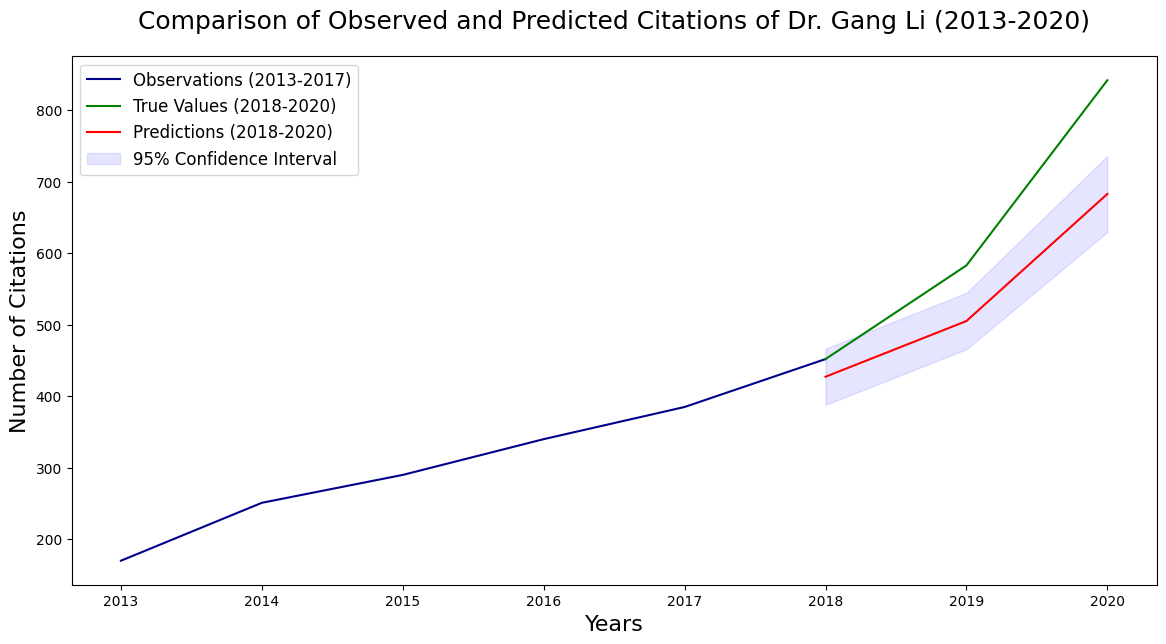

In [ ]:
# Plotting the citations from 2013-2017, predicted citations (2018-2020) against actual citations (2018-2020) and also the corresponding confidence interval at 95% 
train_data = range(2013,2019)
train_list = list(trainingData[10:]) + [testData[0]]
test_data = range(2018,2021)
plt.figure(figsize=[14,7], dpi=100)
plt.plot(train_data, train_list, color='darkblue')
plt.plot(test_data, testData, color='green' )
plt.plot(test_data, predictions, color='red')
plt.fill_between(test_data, np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1], alpha=0.1, color='b')
plt.legend(labels=['Observations (2013-2017)', 'True Values (2018-2020)', 'Predictions (2018-2020)', '95% Confidence Interval'], fontsize=12)
plt.title('Comparison of Observed and Predicted Citations of Dr. Gang Li (2013-2020)', pad=20, fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Number of Citations', fontsize=16)
plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**: 
  You will need to run the grid search for parameter $p=[1,2]$, 
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# Conducting Grid Search on Parameters

#trainingData -> 2003-2017
#testData -> 2018-2020

history = [y for y in trainingData] 
predictions = list()
confidence_interval = []
RMSE = []
Parameter = []
p = list(range(1,3)) #[1,2]
q = list(range(1,3)) #[1,2]
d = list(range(1,3)) #[1,2]

# Walk-Forward Validation Approach

for j1 in p:
  for j2 in d:
    for j3 in q:
      for t in range(len(testData)):
        arima_model = ARIMA(history, order=(j1,j2,j3)) # parameter order = (p=j1,d=j2,q=j3)
        arima_model_fit = arima_model.fit()
        results = arima_model_fit.forecast()
        preds = results[0]
        predictions.append(preds)
        observ = testData[t]
        history.append(observ)
      rmse = sqrt(mean_squared_error(testData, predictions))
      history = [y for y in trainingData]
      predictions = list()
      RMSE.append(rmse)
      param_list = [j1,j2,j3]
      Parameter.append(param_list)
      print('Root Mean Square Error (RMSE) for the test with parameter p=%d, d=%d, q=%d is = %.2f' %(j1, j2, j3, rmse))

min_rmse = min(RMSE)
ind = RMSE.index(min_rmse)
optimal_param = Parameter[ind]
print('########################################################')
print(f"The optimal parameter set with minimum RMSE value = {round(min_rmse,2)} is p = {optimal_param[0]}, d = {optimal_param[1]}, q={optimal_param[2]}")

Root Mean Square Error (RMSE) for the test with parameter p=1, d=1, q=1 is = 103.23
Root Mean Square Error (RMSE) for the test with parameter p=1, d=1, q=2 is = 103.70
Root Mean Square Error (RMSE) for the test with parameter p=1, d=2, q=1 is = 97.64
Root Mean Square Error (RMSE) for the test with parameter p=1, d=2, q=2 is = 94.38
Root Mean Square Error (RMSE) for the test with parameter p=2, d=1, q=1 is = 92.95
Root Mean Square Error (RMSE) for the test with parameter p=2, d=1, q=2 is = 102.64
Root Mean Square Error (RMSE) for the test with parameter p=2, d=2, q=1 is = 106.22
Root Mean Square Error (RMSE) for the test with parameter p=2, d=2, q=2 is = 104.28
########################################################
The optimal parameter set with minimum RMSE value = 92.95 is p = 2, d = 1, q=1


In [ ]:
# Generate the seach-results.csv and print the top 6 rows
Results = pd.DataFrame({'RMSE':RMSE,'Parameter':Parameter})
Results.head(6)

,RMSE,Parameter
0,103.228218,"[1, 1, 1]"
1,103.702932,"[1, 1, 2]"
2,97.640804,"[1, 2, 1]"
3,94.379291,"[1, 2, 2]"
4,92.949608,"[2, 1, 1]"
5,102.636291,"[2, 1, 2]"


In [ ]:
# Saving the Results dataframe in csv format to virtual machine
Results.to_csv('Search-results.csv', index=False)
# Downloading the csv file to local machine
from google.colab import files
files.download('Search-results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**: 
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# Optimal Parameter Set
print(optimal_param)

[2, 1, 1]


In [ ]:
# Training Data from year 2003 to 2020
train_new = citations.values[:-1]

# Performing the Arima train on data from 2003 to 2020
history = [y for y in train_new]
predictions = list()
confidence_interval = []
year = 2021 

for t in (range(2)):
  arima_model = ARIMA(history, order=(optimal_param[0],optimal_param[1],optimal_param[2])) # optimal parameter order -> (p=2, d=1, q=1)
  arima_model_fit = arima_model.fit()
  output = arima_model_fit.get_forecast()
  preds = output.predicted_mean[0]
  predictions.append(preds)
  history.append(preds)
  ci = output.conf_int(0.05)
  confidence_interval.append(ci[0])
  print('########################################################')
  print('Predicted Citations for year %d = %d' %(year, int(preds)))
  print('95%% Confidence Interval for year %d: %.2f to %.2f' %(year, ci[0,0], ci[0,1]))
  year += 1


########################################################
Predicted Citations for year 2021 = 1151
95% Confidence Interval for year 2021: 1075.84 to 1227.16
########################################################
Predicted Citations for year 2022 = 1478
95% Confidence Interval for year 2022: 1405.26 to 1552.10


<div class="alert alert-block alert-info">

**Code**: 
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

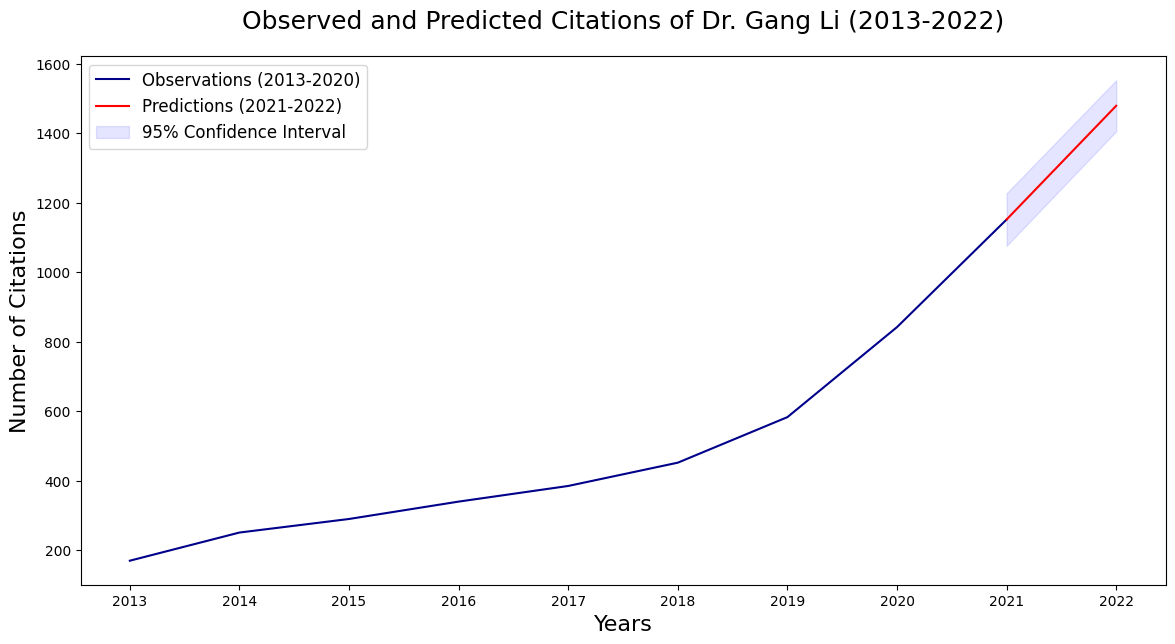

In [ ]:
# Plotting the observed citations from 2013-2020, predicted citations (2020-2021) and also the corresponding confidence interval at 95% 
data = range(2013,2023)
obs_data = range(2013,2022)
obs_list = list(train_new[10:]) + [predictions[0]]
pred_data = range(2021,2023)
plt.figure(figsize=[14,7], dpi=100)
plt.plot(obs_data, obs_list, color='darkblue')
plt.plot(pred_data, predictions, color='red' )
plt.fill_between(pred_data, np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1], alpha=0.1, color='b')
plt.xticks(data)
plt.legend(labels=['Observations (2013-2020)', 'Predictions (2021-2022)', '95% Confidence Interval'], fontsize=12)
plt.title('Observed and Predicted Citations of Dr. Gang Li (2013-2022)', pad=20, fontsize=18)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Number of Citations', fontsize=16)
plt.show()

# Part III - Self-Reflective Essay

## Overview

Refer to the report.
